<a href="https://colab.research.google.com/github/SakshamWase/Projects_developed/blob/main/Customer_Churn_SW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement:
You are the Data Scientist at a telecom company “Neo” whose customers are churning out to its competitors. You have to analyse the data of your company and find insights and stop your customers from churning out to other telecom companies.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('/content/customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# a. Extract the 5th column & store it in ‘customer_5’
customer_5=df.iloc[:,4]
customer_5

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object

In [8]:
c=df.loc[:,['Dependents']]
c

,Dependents
0,No
1,No
2,No
3,No
4,No
...,...
7038,Yes
7039,Yes
7040,Yes
7041,No


In [9]:
# b. Extract the 15th column & store it in ‘customer_15’
customer_15=df.iloc[:,14]
customer_15.head()

0    No
1    No
2    No
3    No
4    No
Name: StreamingMovies, dtype: object

In [10]:
a=df.loc[:,['StreamingMovies']]
a.head()

,StreamingMovies
0,No
1,No
2,No
3,No
4,No


In [11]:
# c. Extract all the male senior citizens whose Payment Method is Electronic check & store the result in ‘senior_male_electronic’
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [12]:
senior_male_electronic=df[(df['gender']=='Male') &  (df['SeniorCitizen']==1) & (df['PaymentMethod']=='Electronic check')]
senior_male_electronic.shape

(298, 21)

In [13]:
# d. Extract all those customers whose tenure is greater than 70 months or their Monthly charges is more than 100$ & store
#     the result in ‘customer_total_tenure’

customer_total_tenure=df[(df['tenure']>70) | (df['MonthlyCharges']>100)]
customer_total_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


In [14]:
#  e. Extract all the customers whose Contract is of two years, payment method is Mailed check & the value of Churn is ‘Yes’
#     & store the result in ‘two_mail_yes’

two_mail_yes=df[(df['Contract']=="Two year") & (df['PaymentMethod']=='Mailed check') & (df['Churn']=='Yes')]
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [15]:
# f. Extract 333 random records from the customer_churn dataframe& store the result in ‘customer_333’

customer_333=df.sample(n=333)
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2726,9392-XBGTD,Male,0,No,Yes,27,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.60,581.85,No
6996,4174-LPGTI,Female,0,Yes,Yes,41,Yes,No,DSL,No,...,No,Yes,No,Yes,One year,Yes,Bank transfer (automatic),66.50,2728.6,Yes
1510,7898-PDWQE,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),80.40,5727.15,No
6755,9003-CPATH,Male,0,No,No,42,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Electronic check,79.90,3313.4,No
764,7969-FFOWG,Male,0,Yes,Yes,65,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.90,1292.6,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,9146-JRIOX,Female,0,Yes,Yes,14,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,25.55,372.45,No
3689,9488-HGMJH,Female,1,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,71.15,71.15,Yes
2989,3308-MHOOC,Male,0,No,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.20,19.2,No
5026,1401-FTHFQ,Male,0,Yes,Yes,23,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3,No


In [16]:
# g. Get the count of different levels from the ‘Churn’ column

df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [17]:
df['InternetService']

0               DSL
1               DSL
2               DSL
3               DSL
4       Fiber optic
           ...     
7038            DSL
7039    Fiber optic
7040            DSL
7041    Fiber optic
7042    Fiber optic
Name: InternetService, Length: 7043, dtype: object

In [18]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [19]:
df['InternetService'].value_counts().keys().tolist()


['Fiber optic', 'DSL', 'No']

B) Data Visualization:

In [20]:
# a. Build a bar-plot for the ’InternetService’ column:
#     i. Set x-axis label to ‘Categories of Internet Service’
#     ii. Set y-axis label to ‘Count of Categories’
#     iii. Set the title of plot to be ‘Distribution of Internet Service’
#     iv. Set the color of the bars to be ‘orange’

In [21]:
%matplotlib inline
x=df['InternetService'].value_counts().keys().tolist()
y=df['InternetService'].value_counts().tolist()

Text(0.5, 1.0, 'Distribution of Internet Service')

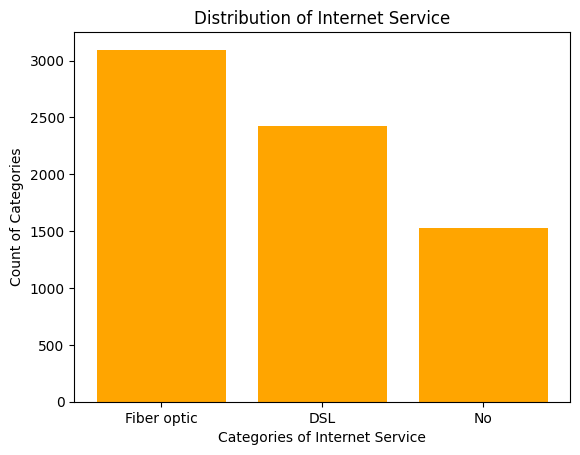

In [22]:
plt.bar(x,y, color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')

In [23]:
# b. Build a histogram for the ‘tenure’ column:
#   i. Set the number of bins to be 30
#   ii. Set the color of the bins to be ‘green’
#   iii. Assign the title ‘Distribution of tenure’

Text(0.5, 1.0, 'Distribution of Tenure')

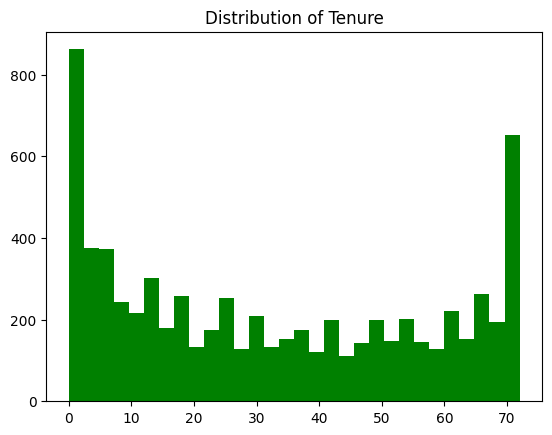

In [24]:
plt.hist(df['tenure'], color='green', bins=30)
plt.title('Distribution of Tenure')

In [25]:
# c. Build a scatter-plot between ‘MonthlyCharges’ & ‘tenure’. Map ‘MonthlyCharges’ to
#    the y-axis & ‘tenure’ to the ‘x-axis’:
#     i. Assign the points a color of ‘brown’
#     ii. Set the x-axis label to ‘Tenure of customer’
#     iii. Set the y-axis label to ‘Monthly Charges of customer’
#     iv. Set the title to ‘Tenure vs Monthly Charges’

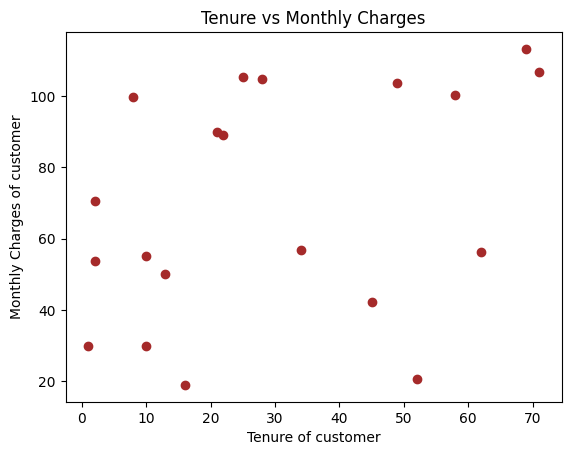

In [26]:
plt.scatter(x=df['tenure'].head(20), y=df['MonthlyCharges'].head(20), color='brown')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.show()

In [27]:
# d. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis &
#     ‘Contract’ on the x-axis.

<Axes: title={'center': 'tenure'}, xlabel='[Contract]'>

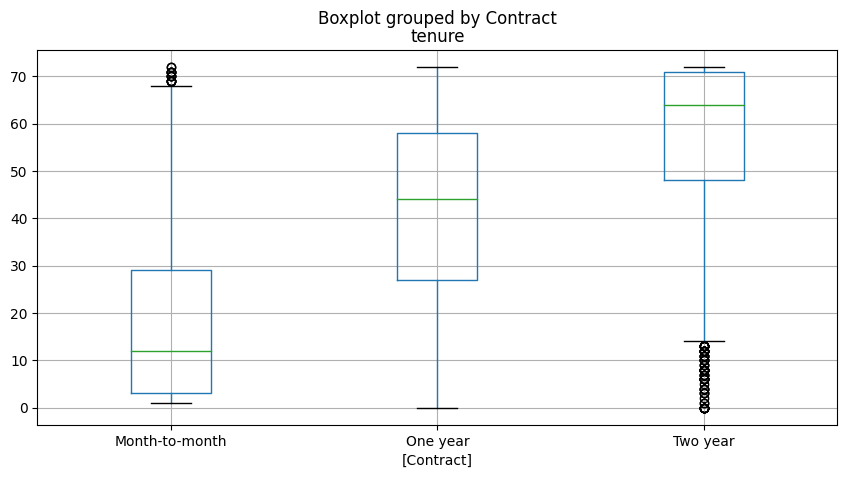

In [28]:
df.boxplot(column='tenure', by=['Contract'], figsize=(10,5))

In [29]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [30]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


C) Linear Regression:

In [31]:
# a. Build a simple linear model where dependent variable is ‘MonthlyCharges’ and
#    independent variable is ‘tenure’
#     i. Divide the dataset into train and test sets in 70:30 ratio.
#     ii. Build the model on train set and predict the values on test set
#     iii. After predicting the values, find the root mean square error
#     iv. Find out the error in prediction & store the result in ‘error’
#     v. Find the root mean square error

In [32]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [33]:
df['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

In [34]:
x=df.loc[:,['tenure']].values
y=df.loc[:,['MonthlyCharges']].values

In [35]:
x

array([[ 1],
       [34],
       [ 2],
       ...,
       [11],
       [ 4],
       [66]])

In [36]:
x_train, x_test , y_train , y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [37]:
from sklearn.linear_model import LinearRegression
simpleLinearRegression = LinearRegression()
simpleLinearRegression.fit(x_train,y_train)


LinearRegression()

In [38]:
y_pred = simpleLinearRegression.predict(x_test)
y_pred

array([[60.95089608],
       [72.98096699],
       [59.1903979 ],
       ...,
       [75.62171426],
       [70.63363608],
       [65.6455579 ]])

In [39]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_pred, y_test)
mse

864.0415701364655

In [40]:
#RMSE
rmse = np.sqrt(mse)
rmse

29.394584027273893

D) Logistic Regression:

In [41]:
# a. Build a simple logistic regression modelwhere dependent variable is ‘Churn’ &
#    independent variable is ‘MonthlyCharges’
#      i. Divide the dataset in 65:35 ratio
#      ii. Build the model on train set and predict the values on test set
#      iii. Build the confusion matrix and get the accuracy score

In [42]:
x = df.loc[:,['MonthlyCharges']].values
y = df.loc[:,['Churn']].values

In [43]:
x_train, x_test , y_train , y_test=train_test_split(x,y,train_size=0.65,random_state=0)

In [44]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [45]:
y_pred = logmodel.predict(x_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [46]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_pred,y_test),accuracy_score(y_pred,y_test)

(array([[1815,  651],
        [   0,    0]]),
 0.7360097323600974)

In [47]:
# b. Build a multiple logistic regression model where dependent variable is ‘Churn’ &
#    independent variables are ‘tenure’ & ‘MonthlyCharges’
#      i. Divide the dataset in 80:20 ratio
#      ii. Build the model on train set and predict the values on test set
#      iii. Build the confusion matrix and get the accuracy score

In [48]:
x = df.loc[:,['MonthlyCharges','tenure']].values
y = df.loc[:,['Churn']].values

In [49]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [50]:
y_pred = logmodel.predict(x_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [51]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_pred,y_test),accuracy_score(y_pred,y_test)

(array([[1815,  651],
        [   0,    0]]),
 0.7360097323600974)

E) Decision Tree:

In [52]:
# a. Build a decision tree model where dependent variable is ‘Churn’ & independent
#    variable is ‘tenure’
#      i. Divide the dataset in 80:20 ratio
#      ii. Build the model on train set and predict the values on test set
#      iii. Build the confusion matrix and calculate the accuracy

In [53]:
x = df.loc[:,['tenure']].values
y = df.loc[:,['Churn']].values

In [54]:
x_train, x_test , y_train , y_test=train_test_split(x,y,test_size=0.20)

In [55]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [56]:
y_pred = classifier.predict(x_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [57]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[953  80]
 [250 126]]
0.765791341376863


F) Random Forest:

In [58]:
# a. Build a Random Forest model where dependent variable is ‘Churn’ & independent
#    variables are ‘tenure’ and ‘MonthlyCharges’
#     i. Divide the dataset in 70:30 ratio
#     ii. Build the model on train set and predict the values on test set
#     iii. Build the confusion matrix and calculate the accuracy

In [59]:
x = df.loc[:,['tenure','MonthlyCharges']].values
y = df.loc[:,['Churn']].values

In [60]:
x_train, x_test , y_train , y_test=train_test_split(x,y,test_size=0.30)

In [61]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)

RandomForestClassifier()

In [62]:
y_pred = clf.predict(x_test)
y_pred

array(['Yes', 'Yes', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

In [63]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[1329  230]
 [ 319  235]]
0.7401798390913393
